In [89]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import numpy as np
import pandas as pd
import scipy
import seaborn

In [2]:
# %pip install scipy

## Load Data

In [3]:
# read in contracts
df_contract = pd.read_csv('contracts.csv')
df_contract.head()

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager
0,"Klingberg, John",Anaheim Ducks,"Jul. 29, 2022",Standard (UFA),1 year,"$7,000,000","$7,000,000",/players/john-klingberg,/teams/ducks,PAT VERBEEK
1,"Terry, Troy",Anaheim Ducks,"Aug. 2, 2023",Standard (RFA),7 years,"$7,000,000","$49,000,000",/players/troy-terry,/teams/ducks,PAT VERBEEK
2,"Killorn, Alex",Anaheim Ducks,"Jul. 1, 2023",Standard (UFA),4 years,"$6,250,000","$25,000,000",/players/alex-killorn,/teams/ducks,PAT VERBEEK
3,"Zegras, Trevor",Anaheim Ducks,"Oct. 2, 2023",Standard (RFA),3 years,"$5,750,000","$17,250,000",/players/trevor-zegras,/teams/ducks,PAT VERBEEK
4,"Strome, Ryan",Anaheim Ducks,"Jul. 13, 2022",Standard (UFA),5 years,"$5,000,000","$25,000,000",/players/ryan-strome,/teams/ducks,PAT VERBEEK


In [4]:
# read in cap history
df_cap = pd.read_csv('capHistory.csv')
df_cap

,season,dateConfirmed,percentChange,upperLimit,lowerLimit,minSalary
0,2025-26,NHL Estimate,5.14%,"$92,000,000","$68,000,000","$775,000"
1,2024-25,NHL Estimate,4.79%,"$87,500,000","$64,700,000","$775,000"
2,2023-24,"Jun. 23, 2023",1.21%,"$83,500,000","$61,700,000","$775,000"
3,2022-23,"Mar. 29, 2022",1.23%,"$82,500,000","$61,000,000","$750,000"
4,2021-22,"Jul. 1, 2021",0.00%,"$81,500,000","$60,200,000","$750,000"
5,2020-21,"Jul. 10, 2020",0.00%,"$81,500,000","$60,200,000","$700,000"
6,2019-20,"Jun. 22, 2019",2.52%,"$81,500,000","$60,200,000","$700,000"
7,2018-19,"Jun. 21, 2018",6.00%,"$79,500,000","$58,800,000","$650,000"
8,2017-18,"Jun. 18, 2017",2.74%,"$75,000,000","$55,400,000","$650,000"
9,2016-17,"Jun. 21, 2016",2.24%,"$73,000,000","$54,000,000","$575,000"


In [5]:
# read in statistics
df_stats = pd.read_csv('playerStats.csv',
                       dtype={'gamesPlayed': 'string',
                              'goals': 'string',
                              'assists': 'string',
                              'points': 'string',
                              'plusMinus': 'string',
                              'pim': 'string',
                              'gamesPlayedPlayoff': 'string',
                              'goalsPlayoff': 'string',
                              'assistsPlayoff': 'string',
                              'pointsPlayoff': 'string',
                              'plusMinusPlayoff': 'string',
                              'pimPlayoff': 'string'})
df_stats.head()

,playerLink,position,season,teamName,leagueName,nullCol1,gamesPlayed,goals,assists,points,plusMinus,pim,nullCol2,nullCol3,gamesPlayedPlayoff,goalsPlayoff,assistsPlayoff,pointsPlayoff,plusMinusPlayoff,pimPlayoff
0,/players/john-klingberg,Right Defense,2007-08,Frölunda HC U16,U16 SM,NaN,6,2,4,6,9,2,|,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,/players/john-klingberg,Right Defense,2008-09,Göteborg,TV-Pucken,NaN,8,0,2,2,-,6,|,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,/players/john-klingberg,Right Defense,2008-09,Frölunda HC J18,J18 Region,NaN,16,3,8,11,-,8,|,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,/players/john-klingberg,Right Defense,2008-09,Frölunda HC J18,J18 Nationell,NaN,14,0,4,4,-,4,|,PLAYOFFS,3,0,0,0,<NA>,0
4,/players/john-klingberg,Right Defense,2009-10,Frölunda HC J18,J18 Region,NaN,10,2,4,6,-,12,|,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [49]:
# read in contract data per year
df_contract_per_year = pd.read_csv('playerContractPerYear.csv')
df_contract_per_year.head()

,playerLink,generalManagerLink,signDate,season,clause,capHit,aav,potentialBonuses,signingBonuses,baseSalary,totalSalary,minorsSalary
0,/players/john-klingberg,/staff/brad-treliving,"Jul. 1, 2023",2023-24,M-NTC,"$4,150,000","$4,150,000",$0,"$2,000,000","$2,150,000","$4,150,000","$4,150,000"
1,/players/john-klingberg,/staff/joe-nieuwendyk,"May 16, 2011",2011-12,NaN,"$743,333","$900,000",–,"$90,000",ENTRY-LEVEL SLIDE,NaN,NaN
2,/players/john-klingberg,/staff/joe-nieuwendyk,"May 16, 2011",2012-13,NaN,"$713,333","$870,000","$235,000","$90,000","$575,000","$665,000","$67,500"
3,/players/john-klingberg,/staff/joe-nieuwendyk,"May 16, 2011",2013-14,NaN,"$713,333","$870,000","$135,000","$90,000","$675,000","$765,000","$67,500"
4,/players/john-klingberg,/staff/joe-nieuwendyk,"May 16, 2011",2014-15,NaN,"$713,333","$870,000","$100,000",$0,"$710,000","$710,000","$67,500"


## Clean Data

#### Cap History

In [7]:
# remove unconfirmed cap history
df_cap = df_cap[df_cap['dateConfirmed'] != 'NHL Estimate'].copy()

# convert dateConfirmed to datetime object
df_cap['dateConfirmed'] = pd.to_datetime(df_cap['dateConfirmed'])

# convert percent string to numeric
df_cap['percentChange'] = df_cap['percentChange'].str.rstrip('%').astype(float) / 100

# convert money string to numeric
df_cap['upperLimit'] = df_cap['upperLimit'].replace( '[\$,)]','', regex=True).astype(float)
df_cap['lowerLimit'] = df_cap['lowerLimit'].replace( '[\$,)]','', regex=True).astype(float)
df_cap['minSalary'] = df_cap['minSalary'].replace( '[\$,)]','', regex=True).astype(float)

# add seasonId var
df_cap['seasonId'] = df_cap['season'].str[0:4].astype(int)

In [8]:
df_cap

,season,dateConfirmed,percentChange,upperLimit,lowerLimit,minSalary,seasonId
2,2023-24,2023-06-23,0.0121,83500000.0,61700000.0,775000.0,2023
3,2022-23,2022-03-29,0.0123,82500000.0,61000000.0,750000.0,2022
4,2021-22,2021-07-01,0.0000,81500000.0,60200000.0,750000.0,2021
5,2020-21,2020-07-10,0.0000,81500000.0,60200000.0,700000.0,2020
6,2019-20,2019-06-22,0.0252,81500000.0,60200000.0,700000.0,2019
7,2018-19,2018-06-21,0.0600,79500000.0,58800000.0,650000.0,2018
8,2017-18,2017-06-18,0.0274,75000000.0,55400000.0,650000.0,2017
9,2016-17,2016-06-21,0.0224,73000000.0,54000000.0,575000.0,2016
10,2015-16,2015-06-23,0.0348,71400000.0,52800000.0,575000.0,2015
11,2014-15,2014-06-27,0.0731,69000000.0,51000000.0,525000.0,2014


#### Contracts Signed By GM

In [9]:
df_contract.head()

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager
0,"Klingberg, John",Anaheim Ducks,"Jul. 29, 2022",Standard (UFA),1 year,"$7,000,000","$7,000,000",/players/john-klingberg,/teams/ducks,PAT VERBEEK
1,"Terry, Troy",Anaheim Ducks,"Aug. 2, 2023",Standard (RFA),7 years,"$7,000,000","$49,000,000",/players/troy-terry,/teams/ducks,PAT VERBEEK
2,"Killorn, Alex",Anaheim Ducks,"Jul. 1, 2023",Standard (UFA),4 years,"$6,250,000","$25,000,000",/players/alex-killorn,/teams/ducks,PAT VERBEEK
3,"Zegras, Trevor",Anaheim Ducks,"Oct. 2, 2023",Standard (RFA),3 years,"$5,750,000","$17,250,000",/players/trevor-zegras,/teams/ducks,PAT VERBEEK
4,"Strome, Ryan",Anaheim Ducks,"Jul. 13, 2022",Standard (UFA),5 years,"$5,000,000","$25,000,000",/players/ryan-strome,/teams/ducks,PAT VERBEEK


In [10]:
# convert sign date to datetime format
dates = df_contract['signDate']
clean_dates = []
for date in dates:
    if date[3] != '.':
        date = date[:3] + '.' + date[3:]
    clean_dates.append(date)
df_contract['signDate'] = pd.to_datetime(clean_dates)

# convert term from str to int
df_contract['term'] = df_contract['term'].str[0:2].astype(int)

# convert currency to float
df_contract['aav'] = df_contract['aav'].replace( '[\$,)]','', regex=True).astype(float)
df_contract['totalValue'] = df_contract['totalValue'].replace( '[\$,)]','', regex=True).astype(float)

# calculate sign season
df_contract['signSeason'] = np.where(df_contract['signDate'].dt.month < 3,
                                     df_contract['signDate'].dt.year - 1,
                                     df_contract['signDate'].dt.year)

In [11]:
df_contract.head()

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager,signSeason
0,"Klingberg, John",Anaheim Ducks,2022-07-29,Standard (UFA),1,7000000.0,7000000.0,/players/john-klingberg,/teams/ducks,PAT VERBEEK,2022
1,"Terry, Troy",Anaheim Ducks,2023-08-02,Standard (RFA),7,7000000.0,49000000.0,/players/troy-terry,/teams/ducks,PAT VERBEEK,2023
2,"Killorn, Alex",Anaheim Ducks,2023-07-01,Standard (UFA),4,6250000.0,25000000.0,/players/alex-killorn,/teams/ducks,PAT VERBEEK,2023
3,"Zegras, Trevor",Anaheim Ducks,2023-10-02,Standard (RFA),3,5750000.0,17250000.0,/players/trevor-zegras,/teams/ducks,PAT VERBEEK,2023
4,"Strome, Ryan",Anaheim Ducks,2022-07-13,Standard (UFA),5,5000000.0,25000000.0,/players/ryan-strome,/teams/ducks,PAT VERBEEK,2022


#### Player Statistics

In [12]:
df_stats = df_stats[(df_stats['leagueName']=='NHL') & (df_stats['position']!='Goaltender')]\
                .drop(['nullCol1', 'nullCol2', 'nullCol3'], axis=1)\

cols = ['gamesPlayed', 'goals', 'assists', 'points', 'plusMinus', 'pim',
        'gamesPlayedPlayoff', 'goalsPlayoff', 'assistsPlayoff', 'pointsPlayoff',
        'plusMinusPlayoff', 'pimPlayoff']
df_stats[cols] = df_stats[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_stats = df_stats.fillna(0)
df_stats.head()

,playerLink,position,season,teamName,leagueName,gamesPlayed,goals,assists,points,plusMinus,pim,gamesPlayedPlayoff,goalsPlayoff,assistsPlayoff,pointsPlayoff,plusMinusPlayoff,pimPlayoff
30,/players/john-klingberg,Right Defense,2014-15,Dallas Stars,NHL,65,11,29,40,5,32,0,0,0,0,0,0
35,/players/john-klingberg,Right Defense,2015-16,Dallas Stars,NHL,76,10,48,58,22,30,13,1,3,4,-5,2
36,/players/john-klingberg,Right Defense,2016-17,Dallas Stars,NHL,80,13,36,49,2,34,0,0,0,0,0,0
40,/players/john-klingberg,Right Defense,2017-18,Dallas Stars,NHL,82,8,59,67,10,26,0,0,0,0,0,0
44,/players/john-klingberg,Right Defense,2018-19,Dallas Stars,NHL,64,10,35,45,6,12,13,2,7,9,8,6


#### Player Contract Per Year

In [50]:
df_contract_per_year.head()

,playerLink,generalManagerLink,signDate,season,clause,capHit,aav,potentialBonuses,signingBonuses,baseSalary,totalSalary,minorsSalary
0,/players/john-klingberg,/staff/brad-treliving,"Jul. 1, 2023",2023-24,M-NTC,"$4,150,000","$4,150,000",$0,"$2,000,000","$2,150,000","$4,150,000","$4,150,000"
1,/players/john-klingberg,/staff/joe-nieuwendyk,"May 16, 2011",2011-12,NaN,"$743,333","$900,000",–,"$90,000",ENTRY-LEVEL SLIDE,NaN,NaN
2,/players/john-klingberg,/staff/joe-nieuwendyk,"May 16, 2011",2012-13,NaN,"$713,333","$870,000","$235,000","$90,000","$575,000","$665,000","$67,500"
3,/players/john-klingberg,/staff/joe-nieuwendyk,"May 16, 2011",2013-14,NaN,"$713,333","$870,000","$135,000","$90,000","$675,000","$765,000","$67,500"
4,/players/john-klingberg,/staff/joe-nieuwendyk,"May 16, 2011",2014-15,NaN,"$713,333","$870,000","$100,000",$0,"$710,000","$710,000","$67,500"


In [67]:
df_tmp = df_contract_per_year.copy()

# filter contract years during lockout year (NHL skipped playing this year)
df_tmp = df_tmp[df_tmp['capHit']!='NHL LOCKOUT / 24% ROLLBACK FOLLOWS']

# filter out contract years posteponed for other reasons
df_tmp = df_tmp[df_tmp['capHit']!='TOLLED/POSTPONED SEASON']

# convert sign date to datetime format
dates = df_tmp['signDate']
clean_dates = []
for date in dates:
    if date == 'does-not-exist' or date == 'Unknown':
        date = 'Jan. 1, 1970'
    if date[3] != '.':
        date = date[:3] + '.' + date[3:]
    clean_dates.append(date)
df_tmp['signDate'] = pd.to_datetime(clean_dates)

# replace NaN with None for trade clause field
df_tmp['clause'] = df_tmp['clause'].fillna('None')

# replace NaN with $0
df_tmp['totalSalary'] = df_tmp['totalSalary'].fillna('$0')
df_tmp['minorsSalary'] = df_tmp['minorsSalary'].fillna('$0')

# replace Entry-Level-Slide rows with $0
df_tmp['baseSalary'] = df_tmp['baseSalary'].replace('ENTRY-LEVEL SLIDE','$0')

# replace no potentialBonuses with $0
df_tmp['potentialBonuses'] = df_tmp['potentialBonuses'].replace('–','$0')

# convert currency to float
cols = ['capHit', 'aav', 'potentialBonuses', 'signingBonuses', 'baseSalary', 'totalSalary', 'minorsSalary']
for col in cols:
    df_tmp[cols] = df_tmp[cols].replace( '[\$,)]','', regex=True).astype(float)

df_tmp = df_tmp.sort_values(['season', 'signDate'], ascending=False)\
            .drop_duplicates(['playerLink', 'season'], keep='first')

df_contract_per_year = df_tmp
df_contract_per_year.head()

,playerLink,generalManagerLink,signDate,season,clause,capHit,aav,potentialBonuses,signingBonuses,baseSalary,totalSalary,minorsSalary
7495,/players/noah-hanifin,/staff/kelly-mccrimmon,2024-04-11,2031-32,M-NTC,7350000.0,7350000.0,0.0,0.0,5700000.0,5700000.0,5700000.0
18538,/players/gustav-forsling,/staff/bill-zito,2024-03-07,2031-32,M-NTC,5750000.0,5750000.0,0.0,2915000.0,1000000.0,3915000.0,3915000.0
10099,/players/owen-tippett,/staff/daniel-briere1,2024-01-26,2031-32,None,6200000.0,6200000.0,0.0,0.0,4500000.0,4500000.0,4500000.0
1960,/players/william-nylander,/staff/brad-treliving,2024-01-08,2031-32,NMC,11500000.0,11500000.0,0.0,8000000.0,1000000.0,9000000.0,9000000.0
6851,/players/rasmus-dahlin,/staff/kevyn-adams,2023-10-09,2031-32,NMC,11000000.0,11000000.0,0.0,0.0,10000000.0,10000000.0,10000000.0


In [64]:
# TODO: fix miner to account for retained salary, buyout cap penalties
# # df_tmp[df_tmp['playerLink']=='/players/matt-duchene']
# df_tmp[df_tmp['playerLink']=='/players/brent-burns']
# #     .sort_values(['season', 'signDate'], ascending=False)\
# #     .drop_duplicates(['playerLink', 'season'], keep='first')

In [66]:
# df_contract_per_year[df_contract_per_year['playerLink']=='/players/matt-duchene']\
#     .sort_values(['season', 'signDate'], ascending=False)\
#     .drop_duplicates(['playerLink', 'season'], keep='first')

## Join contracts and contract per year
Need to get if contract is entry level

In [70]:
df = df_contract_per_year.merge(
        df_contract[['signDate', 'playerLink', 'generalManager', 'playerName', 'contractType']],
        on=['playerLink', 'signDate'],
        how='left'
     )

df.head()

,playerLink,generalManagerLink,signDate,season,clause,capHit,aav,potentialBonuses,signingBonuses,baseSalary,totalSalary,minorsSalary,generalManager,playerName,contractType
0,/players/noah-hanifin,/staff/kelly-mccrimmon,2024-04-11,2031-32,M-NTC,7350000.0,7350000.0,0.0,0.0,5700000.0,5700000.0,5700000.0,NaN,NaN,NaN
1,/players/gustav-forsling,/staff/bill-zito,2024-03-07,2031-32,M-NTC,5750000.0,5750000.0,0.0,2915000.0,1000000.0,3915000.0,3915000.0,NaN,NaN,NaN
2,/players/owen-tippett,/staff/daniel-briere1,2024-01-26,2031-32,None,6200000.0,6200000.0,0.0,0.0,4500000.0,4500000.0,4500000.0,NaN,NaN,NaN
3,/players/william-nylander,/staff/brad-treliving,2024-01-08,2031-32,NMC,11500000.0,11500000.0,0.0,8000000.0,1000000.0,9000000.0,9000000.0,NaN,NaN,NaN
4,/players/rasmus-dahlin,/staff/kevyn-adams,2023-10-09,2031-32,NMC,11000000.0,11000000.0,0.0,0.0,10000000.0,10000000.0,10000000.0,KEVYN ADAMS,"Dahlin, Rasmus",Standard (RFA)


## Join contracts and stats

In [75]:
df = df.merge(
    df_stats,
    on=['playerLink', 'season'],
    how='right'
)

In [77]:
# df[df['playerLink']=='/players/matt-duchene'].sort_values('season')

In [78]:
df[df['playerLink']=='/players/matt-duchene'].sort_values('season')

,playerLink,generalManagerLink,signDate,season,clause,capHit,aav,potentialBonuses,signingBonuses,baseSalary,totalSalary,minorsSalary,generalManager,playerName,contractType,position,teamName,leagueName,gamesPlayed,goals,assists,points,plusMinus,pim,gamesPlayedPlayoff,goalsPlayoff,assistsPlayoff,pointsPlayoff,plusMinusPlayoff,pimPlayoff
9814,/players/matt-duchene,/staff/greg-sherman,2009-07-16,2009-10,None,900000.0,3200000.0,2300000.0,90000.0,810000.0,900000.0,67500.0,NaN,NaN,NaN,"Right Wing, Centre",Colorado Avalanche,NHL,81,24,31,55,1,16,6,0,3,3,-2,0
9815,/players/matt-duchene,/staff/greg-sherman,2009-07-16,2010-11,None,900000.0,3200000.0,2300000.0,90000.0,810000.0,900000.0,67500.0,NaN,NaN,NaN,"Right Wing, Centre",Colorado Avalanche,NHL,80,27,40,67,-8,33,0,0,0,0,0,0
9816,/players/matt-duchene,/staff/greg-sherman,2009-07-16,2011-12,None,900000.0,3200000.0,2300000.0,90000.0,810000.0,900000.0,67500.0,NaN,NaN,NaN,"Right Wing, Centre",Colorado Avalanche,NHL,58,14,14,28,-11,8,0,0,0,0,0,0
9817,/players/matt-duchene,/staff/greg-sherman,2012-06-23,2012-13,None,3500000.0,3500000.0,0.0,0.0,3250000.0,3250000.0,3250000.0,NaN,NaN,NaN,"Right Wing, Centre",Colorado Avalanche,NHL,47,17,26,43,-12,12,0,0,0,0,0,0
9818,/players/matt-duchene,/staff/greg-sherman,2012-06-23,2013-14,None,3500000.0,3500000.0,0.0,0.0,3750000.0,3750000.0,3750000.0,NaN,NaN,NaN,"Right Wing, Centre",Colorado Avalanche,NHL,71,23,47,70,8,19,2,0,3,3,-1,2
9819,/players/matt-duchene,/staff/greg-sherman,2013-07-18,2014-15,None,6000000.0,6000000.0,0.0,0.0,5500000.0,5500000.0,5500000.0,NaN,NaN,NaN,"Right Wing, Centre",Colorado Avalanche,NHL,82,21,34,55,3,16,0,0,0,0,0,0
9820,/players/matt-duchene,/staff/greg-sherman,2013-07-18,2015-16,None,6000000.0,6000000.0,0.0,0.0,6000000.0,6000000.0,6000000.0,NaN,NaN,NaN,"Right Wing, Centre",Colorado Avalanche,NHL,76,30,29,59,-8,24,0,0,0,0,0,0
9821,/players/matt-duchene,/staff/greg-sherman,2013-07-18,2016-17,None,6000000.0,6000000.0,0.0,0.0,6000000.0,6000000.0,6000000.0,NaN,NaN,NaN,"Right Wing, Centre",Colorado Avalanche,NHL,77,18,23,41,-34,12,0,0,0,0,0,0
9823,/players/matt-duchene,/staff/greg-sherman,2013-07-18,2017-18,None,6000000.0,6000000.0,0.0,0.0,6000000.0,6000000.0,6000000.0,NaN,NaN,NaN,"Right Wing, Centre",Ottawa Senators,NHL,68,23,26,49,-23,14,0,0,0,0,0,0
9822,/players/matt-duchene,/staff/greg-sherman,2013-07-18,2017-18,None,6000000.0,6000000.0,0.0,0.0,6000000.0,6000000.0,6000000.0,NaN,NaN,NaN,"Right Wing, Centre",Colorado Avalanche,NHL,14,4,6,10,1,4,0,0,0,0,0,0


## EDA
Number of contracts signed per season in dataset.

<Axes: xlabel='signSeason'>

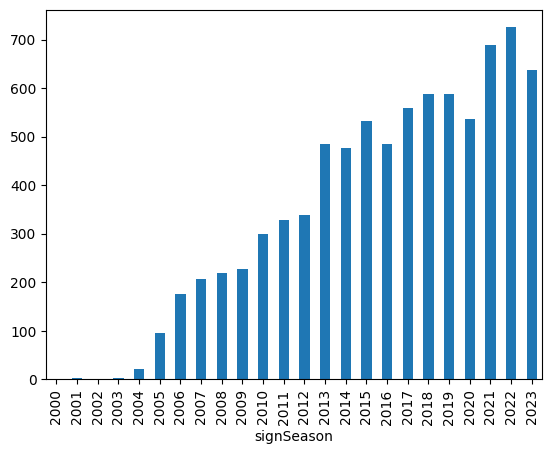

In [82]:
df_contract['signSeason'].value_counts().sort_index().plot(kind='bar')

Comparing min and max contract from each season

In [83]:
df_nonEntry = df_contract[~df_contract['contractType'].str.contains('Entry-Level')]
df_nonEntry.head()

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager,signSeason
0,"Klingberg, John",Anaheim Ducks,2022-07-29,Standard (UFA),1,7000000.0,7000000.0,/players/john-klingberg,/teams/ducks,PAT VERBEEK,2022
1,"Terry, Troy",Anaheim Ducks,2023-08-02,Standard (RFA),7,7000000.0,49000000.0,/players/troy-terry,/teams/ducks,PAT VERBEEK,2023
2,"Killorn, Alex",Anaheim Ducks,2023-07-01,Standard (UFA),4,6250000.0,25000000.0,/players/alex-killorn,/teams/ducks,PAT VERBEEK,2023
3,"Zegras, Trevor",Anaheim Ducks,2023-10-02,Standard (RFA),3,5750000.0,17250000.0,/players/trevor-zegras,/teams/ducks,PAT VERBEEK,2023
4,"Strome, Ryan",Anaheim Ducks,2022-07-13,Standard (UFA),5,5000000.0,25000000.0,/players/ryan-strome,/teams/ducks,PAT VERBEEK,2022


In [84]:
sign_seasons = sorted([season for season in df_nonEntry['signSeason'].unique() if season >= 2006])
sign_seasons

[2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [85]:
highest_aav_by_season = []
for i in range(0, len(sign_seasons)):
    highest_aav_by_season.append(df_nonEntry[df_nonEntry['signSeason']==sign_seasons[i]]\
                                     .sort_values('aav', ascending=False)\
                                     .iloc[0])
pd.DataFrame(highest_aav_by_season)

,playerName,teamName,signDate,contractType,term,aav,totalValue,playerLink,teamLink,generalManager,signSeason
317,"Lidström, Nicklas",Detroit Red Wings,2006-06-30,35+ (UFA),2,7600000.0,15200000.0,/players/nicklas-lidstrom,/teams/redwings,KEN HOLLAND,2006
2047,"Ovechkin, Alex",Washington Capitals,2008-01-10,Standard (RFA),13,9538462.0,124000000.0,/players/alex-ovechkin,/teams/capitals,GEORGE MCPHEE,2007
3020,"Malkin, Evgeni",Pittsburgh Penguins,2008-07-02,Standard (RFA),5,8700000.0,43500000.0,/players/evgeni-malkin,/teams/penguins,RAY SHERO,2008
5424,"Gáborík, Marián",New York Rangers,2009-07-01,Standard (UFA),5,7500000.0,37500000.0,/players/marian-gaborik,/teams/rangers,GLEN SATHER,2009
6375,"Thornton, Joe",San Jose Sharks,2010-10-16,Standard (UFA),3,7000000.0,21000000.0,/players/joe-thornton,/teams/sharks,DOUG WILSON,2010
7226,"Stamkos, Steven",Tampa Bay Lightning,2011-07-18,Standard (RFA),5,7500000.0,37500000.0,/players/steven-stamkos,/teams/lightning,STEVE YZERMAN,2011
3022,"Crosby, Sidney",Pittsburgh Penguins,2012-07-01,Standard (UFA),12,8700000.0,104400000.0,/players/sidney-crosby,/teams/penguins,RAY SHERO,2012
3019,"Malkin, Evgeni",Pittsburgh Penguins,2013-07-01,Standard (UFA),8,9500000.0,76000000.0,/players/evgeni-malkin,/teams/penguins,RAY SHERO,2013
705,"Subban, P.K.",Montreal Canadiens,2014-08-02,Standard (RFA),8,9000000.0,72000000.0,/players/pk-subban,/teams/canadiens,MARC BERGEVIN,2014
5726,"Kopitar, Anze",Los Angeles Kings,2016-01-16,Standard (UFA),8,10000000.0,80000000.0,/players/anze-kopitar,/teams/kings,DEAN LOMBARDI,2015


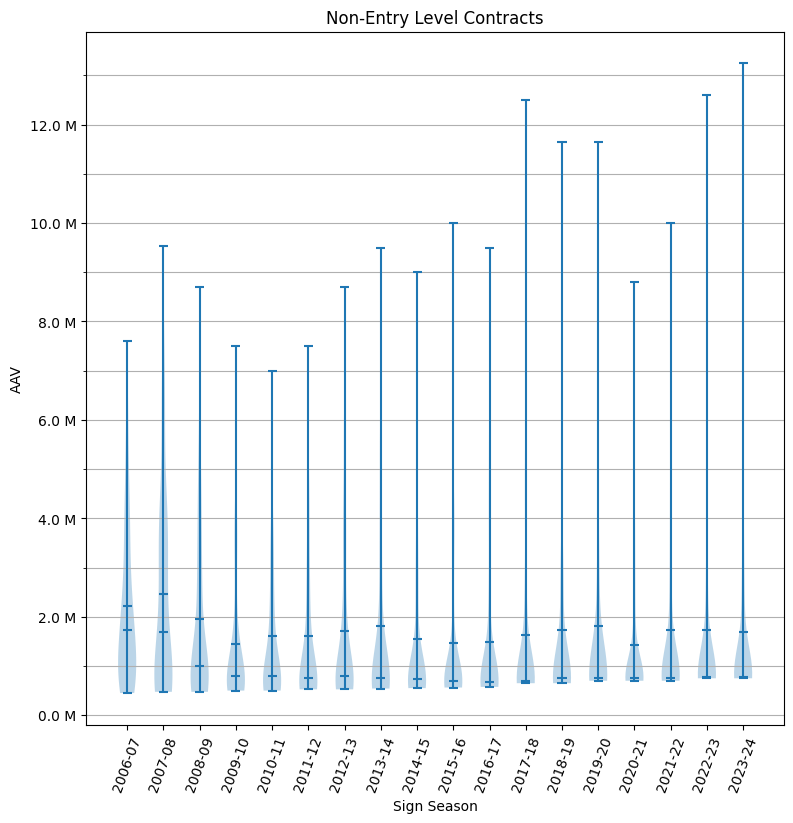

In [90]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

# generate some random test data
sign_seasons = sorted(df_nonEntry[df_nonEntry['signSeason']>=2006]['signSeason'].unique())
all_data = [df_nonEntry[df_nonEntry['signSeason']==year]['aav'] for year in sign_seasons]

# plot violin plot
ax.violinplot(all_data,
                  showmeans=True,
                  showmedians=True)
ax.set_title('Non-Entry Level Contracts')
ax.set_xlabel('Sign Season')
ax.set_ylabel('AAV')

# x axis
sign_seasons_labels = [str(season) + '-' + str(season+1)[2:] for season in sign_seasons]
ax.set_xticks([y + 1 for y in range(len(all_data))],
              labels=sign_seasons_labels)
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=70)

# y axis
y_axis_space_between_ticks = 2000000
ax.yaxis.set_major_locator(ticker.MultipleLocator(y_axis_space_between_ticks))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(y_axis_space_between_ticks/2))
ax.yaxis.set_major_formatter(million_formatter)
ax.yaxis.grid(True, which='both')

plt.show()

#### Density of Contracts Signed Per Year

In [91]:
plt.figure(figsize=(12,8))

for sign_season in sign_seasons[8:]:
    df_tmp = df_contract[df_contract['signSeason']==sign_season].copy()
    cap = df_cap[df_cap['seasonId']==2022]['upperLimit'].iloc[0]
    df_tmp['aavAsPercentOfCap'] = df_tmp['aav'] / cap
    sns.kdeplot(df_tmp['aavAsPercentOfCap']*100, label=sign_season)
plt.legend()
plt.title('Density of AAVs as Percentage of Cap')

NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Density of AAVs as Percentage of Cap - Non-Entry Level Contracts')

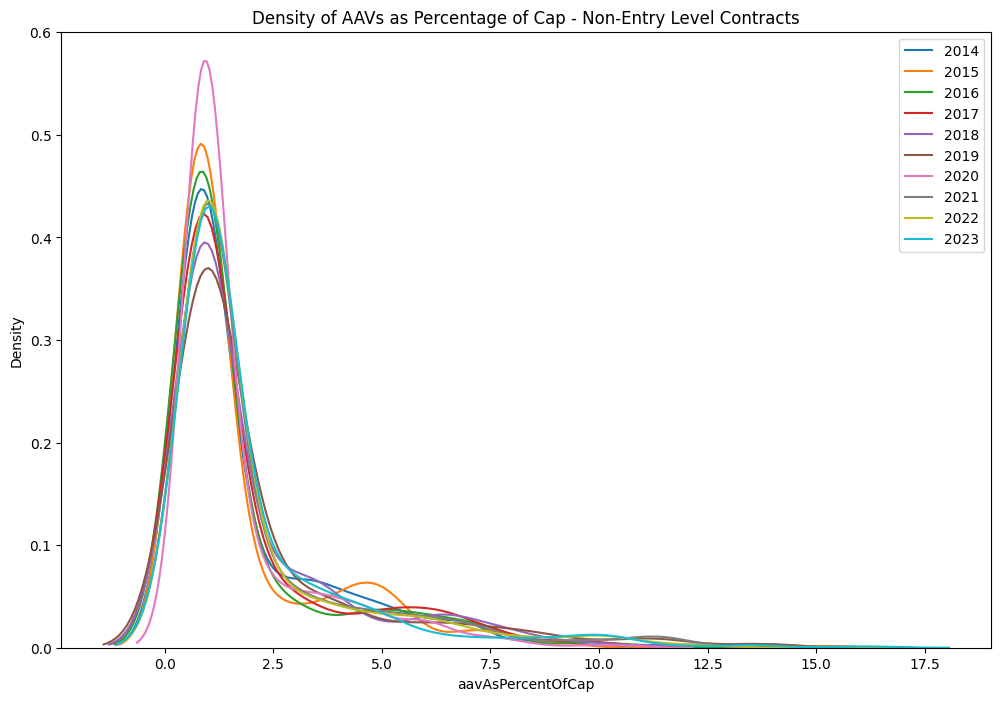

In [98]:
plt.figure(figsize=(12,8))

for sign_season in sign_seasons[8:]:
    df_tmp = df_nonEntry[df_nonEntry['signSeason']==sign_season].copy()
    cap = df_cap[df_cap['seasonId']==2022]['upperLimit'].iloc[0]
    df_tmp['aavAsPercentOfCap'] = df_tmp['aav'] / cap
    sns.kdeplot(df_tmp['aavAsPercentOfCap']*100, label=sign_season)
plt.legend()
plt.title('Density of AAVs as Percentage of Cap - Non-Entry Level Contracts')

#### Share of Games played by players on entry level contracts vs non-entry level contracts

In [113]:
team_names = df['teamName'].unique()

In [111]:
cols = ['contractType', 'gamesPlayed']
df_tmp =\
    df[(df['season']=='2022-23') &
        (df['teamName']=='Carolina Hurricanes')][cols]\
    .groupby('contractType')\
    .sum()\
    .reset_index()
df_tmp['proportion'] = df_tmp['gamesPlayed'] / df_tmp['gamesPlayed'].sum()

df_tmp

,contractType,gamesPlayed,proportion
0,35+ (UFA),73,0.050241
1,Entry-Level (ELC),120,0.082588
2,Standard (RFA),725,0.498968
3,Standard (UFA),535,0.368204


In [121]:
cols = ['teamName', 'contractType', 'gamesPlayed']
df_tmp =\
    df[df['season']=='2022-23'][cols]\
    .groupby(['teamName', 'contractType'])\
    .sum()\
    .reset_index()

df_tmp['proportion'] = df_tmp['gamesPlayed'] / 1476 # (12fwds + 6def) * 82games

df_tmp

,teamName,contractType,gamesPlayed,proportion
0,Anaheim Ducks,Entry-Level (ELC),199,0.134824
1,Anaheim Ducks,Standard (RFA),419,0.283875
2,Anaheim Ducks,Standard (UFA),843,0.571138
3,Arizona Coyotes,Entry-Level (ELC),226,0.153117
4,Arizona Coyotes,Standard (RFA),354,0.239837
...,...,...,...,...
103,Washington Capitals,Standard (RFA),254,0.172087
104,Washington Capitals,Standard (UFA),976,0.661247
105,Winnipeg Jets,Entry-Level (ELC),194,0.131436
106,Winnipeg Jets,Standard (RFA),654,0.443089


<Axes: xlabel='teamName'>

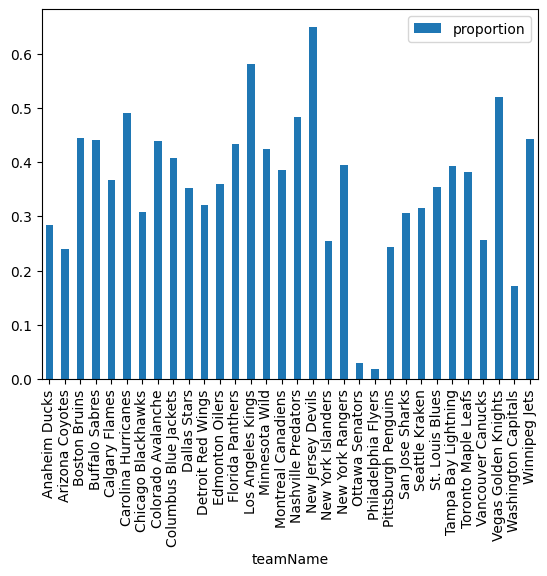

In [123]:
df_tmp[df_tmp['contractType']=='Standard (RFA)'][['teamName', 'proportion']].plot.bar(x='teamName', y='proportion')

<Axes: xlabel='teamName'>

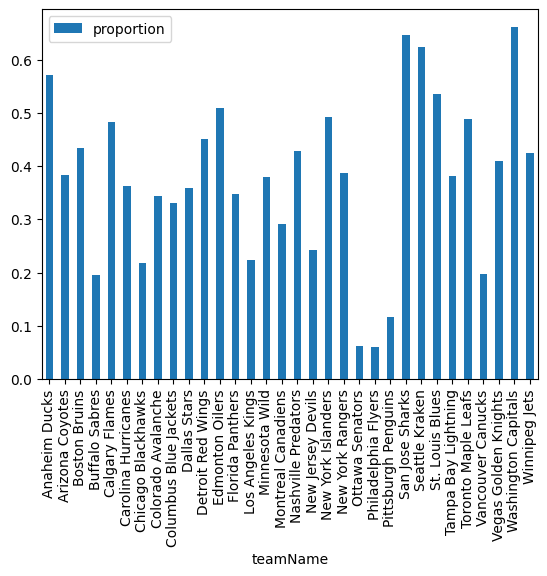

In [124]:
df_tmp[df_tmp['contractType']=='Standard (UFA)'][['teamName', 'proportion']].plot.bar(x='teamName', y='proportion')

<Axes: xlabel='teamName'>

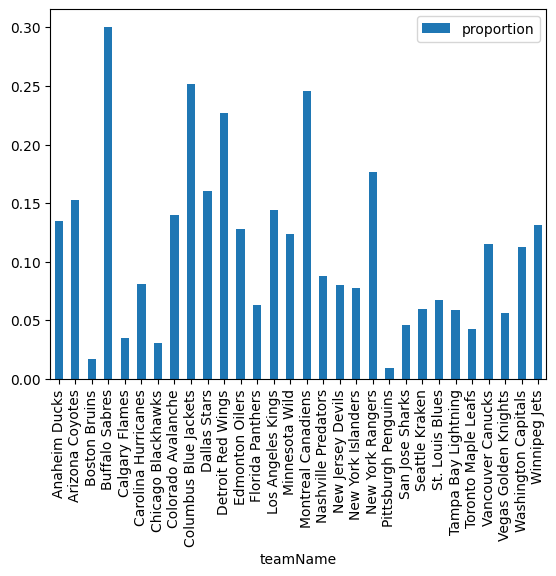

In [127]:
df_tmp[df_tmp['contractType']=='Entry-Level (ELC)'][['teamName', 'proportion']].plot.bar(x='teamName', y='proportion')

#### Roster makeup throughout years

In [130]:
team_name = 'Carolina Hurricanes'
cols = ['season', 'contractType', 'gamesPlayed']
df_tmp =\
    df[df['teamName']==team_name][cols]\
        .groupby(['season', 'contractType'])\
        .sum()\
        .reset_index()

df_tmp['proportion'] = df_tmp['gamesPlayed'] / 1476 # (12fwds + 6def) * 82games
df_tmp.tail(10)

,season,contractType,gamesPlayed,proportion
59,2021-22,Entry-Level (ELC),149,0.100949
60,2021-22,Standard (RFA),680,0.460705
61,2021-22,Standard (UFA),489,0.331301
62,2022-23,35+ (UFA),73,0.049458
63,2022-23,Entry-Level (ELC),120,0.081301
64,2022-23,Standard (RFA),725,0.491192
65,2022-23,Standard (UFA),535,0.362466
66,2023-24,Entry-Level (ELC),154,0.104336
67,2023-24,Standard (RFA),696,0.471545
68,2023-24,Standard (UFA),589,0.399051


<Axes: xlabel='season'>

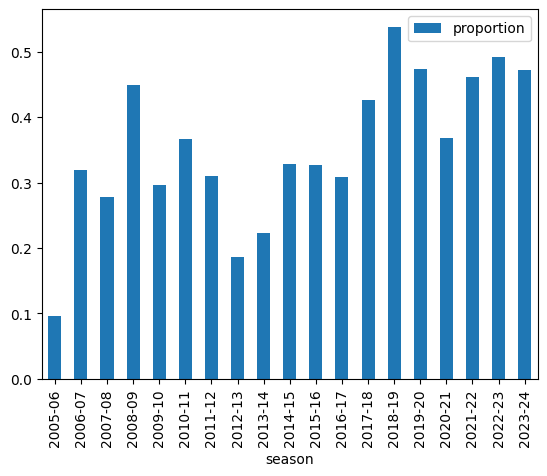

In [137]:
df_tmp[df_tmp['contractType']=='Standard (RFA)']\
    .plot.bar(x='season', y='proportion')